In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%%bash
wc -l imf/*.csv

  365536 imf/BOP_11-25-2018 19-15-19-60_timeSeries.csv
      64 imf/COMMP_11-25-2018 19-13-52-15_timeSeries.csv
   14430 imf/CPI_11-25-2018 19-14-47-26_timeSeries.csv
    1693 imf/FDI_11-20-2018 21-39-31-89_timeSeries.csv
 1247714 imf/GFSR_11-25-2018 19-23-39-70_timeSeries.csv
   16732 imf/IRFCL_11-25-2018 19-13-18-05_timeSeries.csv
    7846 imf/ITS_11-14-2018 15-14-06-02_timeSeries.csv
    7425 imf/PPLT_11-25-2018 19-25-01-32_timeSeries.csv
 1661440 total


In [43]:
pd.options.display.float_format = '{:20,.2f}'.format

In [69]:
file_name = 'CPI_11-25-2018 19-14-47-26_timeSeries.csv'

In [70]:
raw_df = pd.read_csv('imf/%s' % file_name).fillna(0)

In [71]:
raw_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Attribute', '1960M1', '1960M2', '1960M3', '1960M4', '1960M5',
       ...
       '2017M5', '2017M6', '2017M7', '2017M8', '2017M9', '2017M10', '2017M11',
       '2017M12', 'Common Reference Period', 'Unnamed: 702'],
      dtype='object', length=703)

In [72]:
raw_df.head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,1960M1,1960M2,1960M3,1960M4,1960M5,...,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,Common Reference Period,Unnamed: 702
0,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,Value,0,0,0,0,0,...,0.310038024703636,-0.230003241517844,0.240052811618545,0.189930778489097,0.159898785717087,0.420092864798812,0.280051216389246,0.440048049814909,0,0.00
1,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_CP_A_PT,Value,0,0,0,0,0,...,3.59725617777094,2.99849113083766,2.71162576680612,2.45590849402754,2.53769093329227,2.70132088889638,2.8037854253563,2.94742132043471,0,0.00
2,Brazil,223,Communication,PCPIEC_IX,Reference Period,0,0,0,0,0,...,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,0,0.00
3,Brazil,223,Clothing and footwear,PCPIA_IX,Reference Period,0,0,0,0,0,...,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,1993M12,0,0.00
4,France,132,"Restaurants and hotels, Weight",PCPIRE_WT,Value,0,0,0,0,0,...,75.2,75.2,75.2,75.2,75.2,75.2,75.2,75.2,0,0.00
5,France,132,Miscellaneous goods and services,PCPIO_IX,Value,0,0,0,0,0,...,102.41,102.31,102.08,102.29,102.18,101.98,102.24,102.55,2015A,0.00
6,France,132,Miscellaneous goods and services,PCPIO_IX,Reference Period,2015A,2015A,2015A,2015A,2015A,...,2015A,2015A,2015A,2015A,2015A,2015A,2015A,2015A,0,0.00
7,France,132,"Recreation and culture, Weight",PCPIR_WT,Value,0,0,0,0,0,...,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,0,0.00
8,France,132,Restaurants and hotels,PCPIRE_IX,Value,0,0,0,0,0,...,102.43,103.21,105.8,107.85,103.63,102.92,102.81,103.04,2015A,0.00
9,France,132,Restaurants and hotels,PCPIRE_IX,Reference Period,2015A,2015A,2015A,2015A,2015A,...,2015A,2015A,2015A,2015A,2015A,2015A,2015A,2015A,0,0.00


In [73]:
countries = raw_df['Country Name'].unique()

In [74]:
len(countries)

189

In [75]:
cleaned_df = raw_df.loc[raw_df['Attribute'] == 'Value'].drop(columns=['Attribute'])

In [76]:
cleaned_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960M1', '1960M2', '1960M3', '1960M4', '1960M5', '1960M6',
       ...
       '2017M5', '2017M6', '2017M7', '2017M8', '2017M9', '2017M10', '2017M11',
       '2017M12', 'Common Reference Period', 'Unnamed: 702'],
      dtype='object', length=702)

In [77]:
cleaned_df.head(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1960M1,1960M2,1960M3,1960M4,1960M5,1960M6,...,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,Common Reference Period,Unnamed: 702
0,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_PP_PT,0,0,0,0,0,0,...,0.310038024703636,-0.230003241517844,0.240052811618545,0.189930778489097,0.159898785717087,0.420092864798812,0.280051216389246,0.440048049814909,0,0.00
1,Brazil,223,"Consumer Price Index, All items, Percentage ch...",PCPI_PC_CP_A_PT,0,0,0,0,0,0,...,3.59725617777094,2.99849113083766,2.71162576680612,2.45590849402754,2.53769093329227,2.70132088889638,2.8037854253563,2.94742132043471,0,0.00
4,France,132,"Restaurants and hotels, Weight",PCPIRE_WT,0,0,0,0,0,0,...,75.2,75.2,75.2,75.2,75.2,75.2,75.2,75.2,0,0.00
5,France,132,Miscellaneous goods and services,PCPIO_IX,0,0,0,0,0,0,...,102.41,102.31,102.08,102.29,102.18,101.98,102.24,102.55,2015A,0.00
7,France,132,"Recreation and culture, Weight",PCPIR_WT,0,0,0,0,0,0,...,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,0,0.00
8,France,132,Restaurants and hotels,PCPIRE_IX,0,0,0,0,0,0,...,102.43,103.21,105.8,107.85,103.63,102.92,102.81,103.04,2015A,0.00
10,France,132,"Miscellaneous goods and services, Weight",PCPIO_WT,0,0,0,0,0,0,...,134.1,134.1,134.1,134.1,134.1,134.1,134.1,134.1,0,0.00
11,France,132,"Communication, Weight",PCPIEC_WT,0,0,0,0,0,0,...,28.5,28.5,28.5,28.5,28.5,28.5,28.5,28.5,0,0.00
12,France,132,"Education, Weight",PCPIED_WT,0,0,0,0,0,0,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0,0.00
14,Brazil,223,"Consumer Price Index, All items",PCPI_IX,0,0,0,0,0,0,...,4843.41,4832.27,4843.87,4853.07,4860.83,4881.25,4894.92,4916.46,1993M12,0.00


In [78]:
indicators = cleaned_df['Indicator Name'].unique()

In [79]:
len(indicators)

102

In [80]:
print(indicators)

['Consumer Price Index, All items, Percentage change, Previous period'
 'Consumer Price Index, All items, Percentage change, Previous year'
 'Restaurants and hotels, Weight' 'Miscellaneous goods and services'
 'Recreation and culture, Weight' 'Restaurants and hotels'
 'Miscellaneous goods and services, Weight' 'Communication, Weight'
 'Education, Weight' 'Consumer Price Index, All items'
 'Education, Percentage change, Previous year' 'Education'
 'Transport, Weight' 'Communication'
 'Food and non-alcoholic beverages, Weight'
 'Furnishings, household equipment and routine household maintenance'
 'Food and non-alcoholic beverages'
 'Alcoholic Beverages, Tobacco, and Narcotics' 'Clothing and footwear'
 'Housing, Water, Electricity, Gas and Other Fuels' 'Transport' 'Health'
 'Furnishings, household equipment and routine household maintenance, Weight'
 'Alcoholic Beverages, Tobacco, and Narcotics, Weight' 'Health, Weight'
 'Alcoholic Beverages, Tobacco, and Narcotics, Percentage change, Pre

In [137]:
cpi_base_df = cleaned_df.loc[((cleaned_df['Indicator Name'] == 'Consumer Price Index, All items, Percentage change, Previous period') | (cleaned_df['Indicator Name'] == 'Consumer Price Index, All items')) & (cleaned_df['Country Name'].isin(['France', 'Brazil', 'Netherlands', 'China']))].drop(columns=['Country Code', 'Indicator Code']).fillna(0)
cpi_melt_df = pd.melt(cpi_base_df, id_vars=['Country Name', 'Indicator Name'], var_name='year', value_name='value')
cpi_stacked_df = cpi_melt_df.set_index(['Country Name', 'Indicator Name', 'year']).unstack(1).reset_index()
cpi_stacked_df.columns = ['country', 'month', 'cpi change', 'cpi']
cpi_df = cpi_stacked_df[~cpi_stacked_df['month'].isin(['Common Reference Period', 'Unnamed: 702'])]

In [138]:
months = set(cpi_df['month'].values.tolist())

In [139]:
cpi_df.head()

,country,month,cpi change,cpi
0,Brazil,1960M1,0,0
1,Brazil,1960M10,0,0
2,Brazil,1960M11,0,0
3,Brazil,1960M12,0,0
4,Brazil,1960M2,0,0


In [140]:
cpi_df['month'] = pd.to_datetime(cpi_df['month'], format='%YM%m')

/Users/braadbaart/pysphere/me/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
sns.set(style='darkgrid')

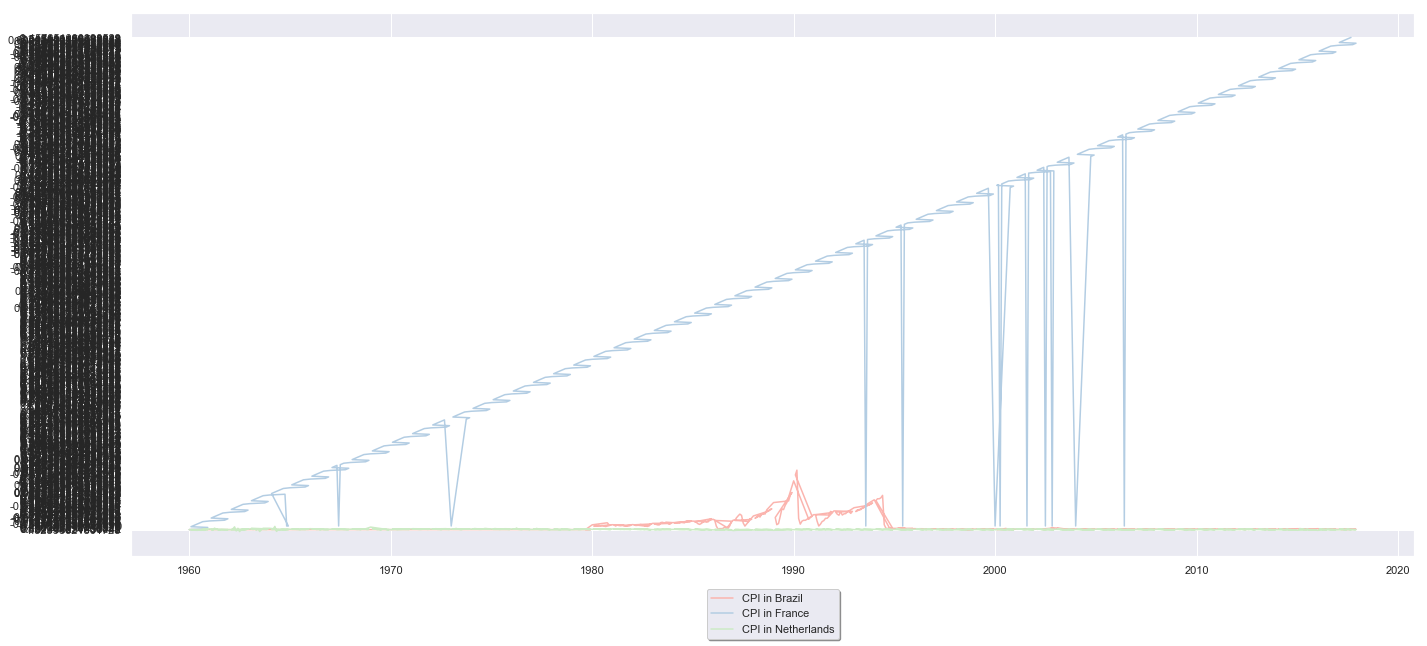

In [156]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Pastel1.colors)
cfig, cax = plt.subplots(figsize=(23,10))

for country, group in cpi_df.groupby(['country']):
    cax.plot(group['month'], group['cpi'], label = 'CPI in %s' % country)
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fancybox = True, shadow = True)
plt.show()

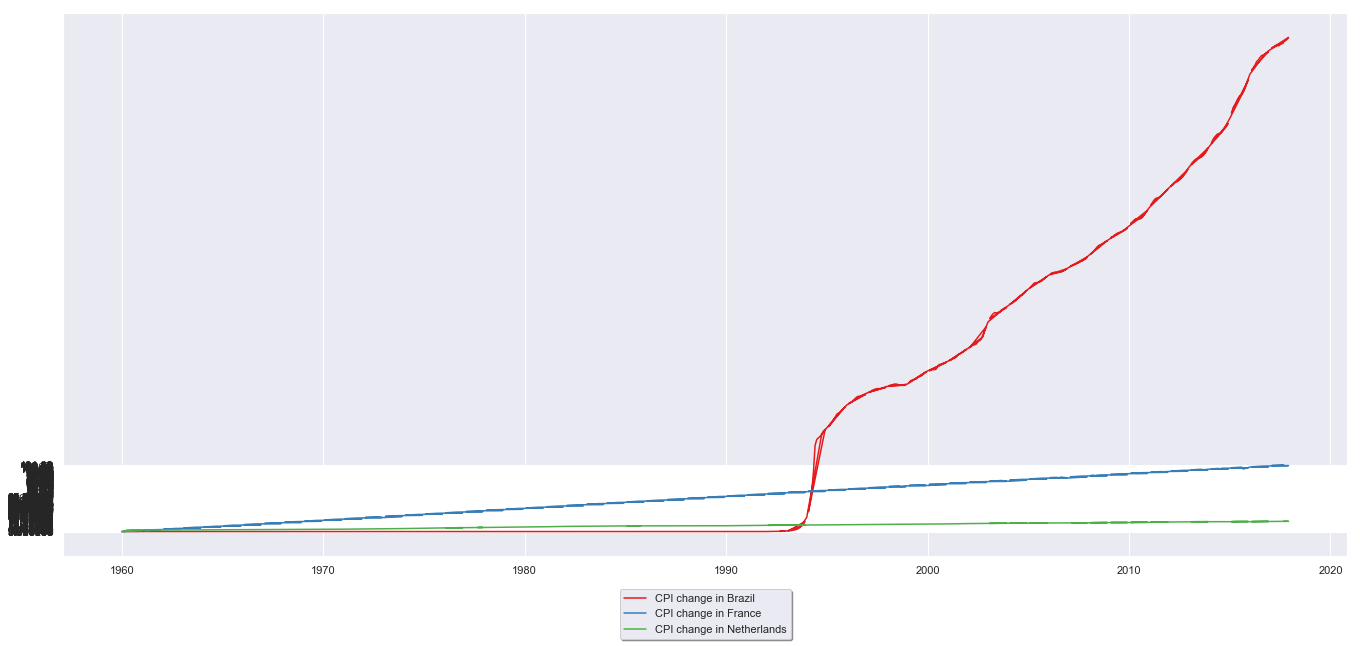

In [154]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
cfig, cax = plt.subplots(figsize=(23,10))

for country, group in cpi_df.groupby(['country']):
    cax.plot(group['month'], group['cpi change'], label = 'CPI change in %s' % country)
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fancybox = True, shadow = True)
plt.show()

In [157]:
cpi_df.head(500)

,country,month,cpi change,cpi
0,Brazil,1960-01-01,0,0
1,Brazil,1960-10-01,0,0
2,Brazil,1960-11-01,0,0
3,Brazil,1960-12-01,0,0
4,Brazil,1960-02-01,0,0
5,Brazil,1960-03-01,0,0
6,Brazil,1960-04-01,0,0
7,Brazil,1960-05-01,0,0
8,Brazil,1960-06-01,0,0
9,Brazil,1960-07-01,0,0
